In [54]:
#   Use cron ewery hour without grath
#-----------------------
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta    
#%matplotlib inline
# print (pd.__name__, pd.__version__)

In [70]:
cid = '4909' # BTC/USDT #4327 # ZEC/BTC 1261 # PAC/DTC 5662 # ETH/BTC 5760 # ETH/USDT
hid = '2' # hours is
path = 'https://www.cryptopia.co.nz/api/GetMarketHistory/' + cid + '/' + hid
r = requests.get(path); r 

<Response [200]>

In [71]:
df = json_normalize(json.loads(r.text)['Data'])
# print (df['Amount'].max())
# print (df['Amount'].mean())
# print (df.info)
# print (df.describe())
# print (df.index)

In [72]:
# анализ запроса
# print (datetime.now()) # сейчас время
# dfrom = datetime.fromtimestamp(df.tail(1)['Timestamp']) # время первой сделки в датафрейме 
# dto = datetime.fromtimestamp(df.iloc[1]['Timestamp']) # время последней сделки 
# dkow = datetime.now() - timedelta(hours=3) # время сейчас с учетом отставания 3 часа
# print (dkow - dto) # отставание последних данных
# print (dto - dfrom) # за сколько данные смотри hid

In [73]:
#newindex = df.set_index(df['Timestamp'])
df.head()

,Amount,Label,Price,Timestamp,Total,TradePairId,Type
0,0.018564,BTC/USDT,7852.0,1521312432,145.765627,4909,Sell
1,0.359993,BTC/USDT,7852.0,1521312414,2826.662209,4909,Sell
2,0.090000,BTC/USDT,7852.0,1521312408,706.680000,4909,Sell
3,0.008208,BTC/USDT,7852.0,1521312406,64.446546,4909,Sell
4,0.012043,BTC/USDT,7890.0,1521312404,95.017850,4909,Sell


In [88]:
df.set_index(keys=df['Timestamp']).tail()

,Amount,Label,Price,Timestamp,Total,TradePairId,Type
Timestamp,,,,,,,
1521305320,0.002952,BTC/USDT,7843.600500,1521305320,23.154936,4909,Sell
1521305312,0.000752,BTC/USDT,7843.600566,1521305312,5.897682,4909,Buy
1521305308,0.001706,BTC/USDT,7843.600566,1521305308,13.383771,4909,Buy
1521305308,0.001318,BTC/USDT,7843.600566,1521305308,10.338493,4909,Buy
1521305273,0.003201,BTC/USDT,7843.600566,1521305273,25.104463,4909,Sell


In [90]:
?df['Timestamp']

In [51]:
newdate = newindex['Timestamp'].to_datetime()

AttributeError: 'Series' object has no attribute 'to_datetime'

In [46]:
newindex.tail()

,Amount,Label,Price,Timestamp,Total,TradePairId,Type
Timestamp,,,,,,,
1521304551,0.000729,BTC/USDT,7887.319892,1970-01-01 00:00:01.521304551,5.751591,4909,Sell
1521304509,0.003142,BTC/USDT,7946.444069,1970-01-01 00:00:01.521304509,24.968125,4909,Buy
1521304480,0.001282,BTC/USDT,7949.555868,1970-01-01 00:00:01.521304480,10.187435,4909,Sell
1521304428,0.000561,BTC/USDT,7949.555868,1970-01-01 00:00:01.521304428,4.462881,4909,Sell
1521304428,0.000729,BTC/USDT,7949.555868,1970-01-01 00:00:01.521304428,5.796975,4909,Buy


In [41]:
#newdf = df; newdf['Inbtc'] = newdf['Price'] * newdf['Amount'] # новый столбец цена в BTC
newdf['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s') # перевод даты
print ('--------------TO-----------------')
print (newdf.iloc[1]['Timestamp']) # начальное время
print ('-------------FROM----------------')
print (newdf.tail(1)['Timestamp'])
newdf

--------------TO-----------------
2018-03-17 18:29:23
-------------FROM----------------
363   NaT
Name: Timestamp, dtype: datetime64[ns]


,Amount,Label,Price,Timestamp,Total,TradePairId,Type,Inbtc
0,0.449901,BTC/USDT,7975.000000,2018-03-17 18:29:39,3587.956886,4909,Buy,3587.956886
1,0.037901,BTC/USDT,7975.000000,2018-03-17 18:29:23,302.262708,4909,Buy,302.262708
2,0.100000,BTC/USDT,7975.000000,2018-03-17 18:29:23,797.498485,4909,Buy,797.498485
3,0.000990,BTC/USDT,7973.000000,2018-03-17 18:29:00,7.891356,4909,Buy,7.891356
4,0.007768,BTC/USDT,7973.000000,2018-03-17 18:29:00,61.933626,4909,Buy,61.933626
5,0.028409,BTC/USDT,7963.332340,2018-03-17 18:28:05,226.228397,4909,Buy,226.228397
6,0.001017,BTC/USDT,7963.332340,2018-03-17 18:27:25,8.097116,4909,Buy,8.097116
7,0.015745,BTC/USDT,7915.705064,2018-03-17 18:26:08,124.629531,4909,Sell,124.629531
8,0.003451,BTC/USDT,7904.533234,2018-03-17 18:26:08,27.280995,4909,Buy,27.280995
9,0.001013,BTC/USDT,7904.533234,2018-03-17 18:24:16,8.005316,4909,Buy,8.005316


In [31]:
newdf = df; newdf['Inbtc'] = newdf['Price'] * newdf['Amount'] # новый столбец цена в BTC
newdf['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s') # перевод даты
print ('--------------TO-----------------')
print (newdf.iloc[1]['Timestamp']) # начальное время
print ('-------------FROM----------------')
print (newdf.tail(1)['Timestamp'])

--------------TO-----------------
2018-03-17 18:24:16
-------------FROM----------------
363   2018-03-17 16:26:01
Name: Timestamp, dtype: datetime64[ns]


In [24]:
# Way One Last DATA
dfnew = newindex.resample('1Min').agg({'Price': 'mean', 'Amount': 'sum', 'Total': 'sum'})# .head()
dfnew['Price'].plot(color='blue',grid=True, secondary_y=True)
dfnew['Total'].plot(color='gray',grid=True)
plt.show()

ValueError: Length mismatch: Expected axis has 366 elements, new values have 364 elements

In [14]:
# загружаем нашу базу 
dfload = pd.DataFrame.from_csv(path='data.csv')
dfload.tail()#)#.index)
print (dfnew.tail())#.index)

                           Price    Amount        Inbtc        Total
Timestamp                                                           
2018-03-17 18:14:00  7959.250000  0.075811   603.399259   603.399259
2018-03-17 18:15:00  7959.556175  0.769891  6127.789693  6127.789693
2018-03-17 18:16:00          NaN       NaN          NaN          NaN
2018-03-17 18:17:00  7959.250000  0.004990    39.716578    39.716578
2018-03-17 18:18:00  7959.250000  0.040062   318.863553   318.863553


In [15]:
dfcc = pd.concat([dfload, dfnew]) # ; dfcc.tail() # сливаем

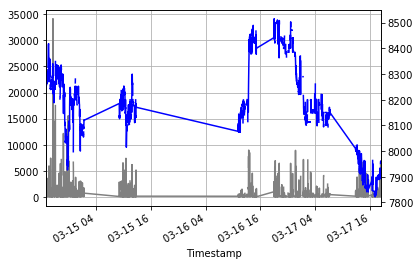

In [16]:
dfcc['Price'].plot(color='blue',grid=True, secondary_y=True)
dfcc['Total'].plot(color='gray',grid=True)
plt.show()

In [38]:
dfcc.to_csv(path_or_buf='data.csv')

In [39]:
print('-------- Last DATA Hour --------')
print(dfcc.tail(1).index)

-------- Last DATA Hour --------
DatetimeIndex(['2018-03-15 12:53:00'], dtype='datetime64[ns]', name='Timestamp', freq=None)
